# Glass fiber-reinforced polyamide 66 3D X-ray computed tomography dataset for deep learning prediction

## `read_raw.ipynb`

This notebook is a demo of how to open `.raw` files.

Put the contents of the `.zip` files in a folder `raws` in this directory before running.

Author: [`joaopcbertoldo`](joaopcbertoldo.github.io)

<a rel="license" href="http://creativecommons.org/licenses/by-sa/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-sa/4.0/88x31.png" /></a><br /><span xmlns:dct="http://purl.org/dc/terms/" href="http://purl.org/dc/dcmitype/Dataset" property="dct:title" rel="dct:type">Glass fiber-reinforced polyamide 66 3D X-ray computed tomography dataset for deep learning prediction</span> by <span xmlns:cc="http://creativecommons.org/ns#" property="cc:attributionName"><a rel="author" href="https://orcid.org/0000-0002-9512-772X">Joao P C Bertoldo</a>, <a rel="author" href="https://orcid.org/0000-0002-1349-8042">Etienne Decencière</a>, <a rel="author" href="https://orcid.org/0000-0003-3268-4892">David Ryckelynck</a>, and <a rel="author" href="https://orcid.org/0000-0002-4075-5577">Henry Proudhon</a></span> is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-sa/4.0/">Creative Commons Attribution-ShareAlike 4.0 International License</a>.

In [1]:
import os
from pathlib import Path

import numpy as np
from matplotlib import pyplot as plt

from read_raw import HST_read

In [2]:
data_dir = Path("./raws").absolute()
sorted(os.listdir(data_dir))

['crack.prediction.raw',
 'crack.prediction.raw.info',
 'crack.raw',
 'crack.raw.info',
 'pa66.ground_truth.raw',
 'pa66.ground_truth.raw.info',
 'pa66.raw',
 'pa66.raw.info',
 'pa66.test.error_volume.raw',
 'pa66.test.error_volume.raw.info',
 'pa66.test.prediction.raw',
 'pa66.test.prediction.raw.info']

You should see the files:

- `crack.raw`
- `crack.raw.info`
- `crack.prediction.raw`
- `crack.prediction.raw.info`
- `pa66.ground_truth.raw`
- `pa66.ground_truth.raw.info`
- `pa66.raw`
- `pa66.raw.info`
- `pa66.test.error_volume.raw`
- `pa66.test.error_volume.raw.info`
- `pa66.test.prediction.raw`
- `pa66.test.prediction.raw.info`

In [3]:
pa66 = dict(
    data="pa66.raw",
    ground_truth="pa66.ground_truth.raw",
    error="pa66.test.error_volume.raw",
    prediction="pa66.test.prediction.raw",
)

crack = dict(
    data="crack.raw",
    prediction="crack.prediction.raw",
)

# transform the filenames in Path objects (it's handy...)
pa66 = {
    key: data_dir / fname 
    for key, fname in pa66.items()
}

crack = {
    key: data_dir / fname 
    for key, fname in crack.items()
}

File sizes

In [4]:
# pa66
for key, file in pa66.items():
    print(f"{key=} {file.stat().st_size / 1024**3:.2f} GB")

key='data' 2.39 GB
key='ground_truth' 2.39 GB
key='error' 0.38 GB
key='prediction' 0.38 GB


In [5]:
# crack
for key, file in crack.items():
    print(f"{key=} {file.stat().st_size / 1024**3:.2f} GB")

key='data' 5.43 GB
key='prediction' 5.43 GB


shapes

In [6]:
for key, file in pa66.items():
    
    info_file = file.with_suffix(".raw.info")
    print(f"{info_file.name}")
    
    with info_file.open("r") as f:
        print(f.read(), "\n")

pa66.raw.info
! PyHST_SLAVE VOLUME INFO FILE
NUM_X = 1300
NUM_Y = 1040
NUM_Z = 1900
 

pa66.ground_truth.raw.info
! PyHST_SLAVE VOLUME INFO FILE
NUM_X = 1300
NUM_Y = 1040
NUM_Z = 1900
 

pa66.test.error_volume.raw.info
! PyHST_SLAVE VOLUME INFO FILE
NUM_X = 1300
NUM_Y = 1040
NUM_Z =  300
DATA_TYPE = uint8
 

pa66.test.prediction.raw.info
! PyHST_SLAVE VOLUME INFO FILE
NUM_X = 1300
NUM_Y = 1040
NUM_Z =  300
DATA_TYPE = uint8
 



Notice that 2 of the files have 1900 z-slices (the full dataset), and 2 have 300 z-slice (only the test set).

In [7]:
for key, file in crack.items():
    
    info_file = file.with_suffix(".raw.info")
    print(f"{info_file.name}")
    
    with info_file.open("r") as f:
        print(f.read(), "\n")

crack.raw.info
! PyHST_SLAVE VOLUME INFO FILE
NUM_X = 1579
NUM_Y = 1845
NUM_Z = 2002
 

crack.prediction.raw.info
! PyHST_SLAVE VOLUME INFO FILE
NUM_X = 1579
NUM_Y = 1845
NUM_Z = 2002
 



load the files

In [8]:
pa66_arrays = {
    key: HST_read(
        str(file),
        autoparse_filename=False,
        data_type=np.uint8,
    )
    for key, file in pa66.items()
}

In [9]:
crack_arrays = {
    key: HST_read(
        str(file),
        autoparse_filename=False,
        data_type=np.uint8,
    )
    for key, file in crack.items()
}

In [10]:
for key, arr in pa66_arrays.items():
    print(f"{key=} \n{arr.dtype=} \n{arr.shape=}\n")

key='data' 
arr.dtype=dtype('uint8') 
arr.shape=(1300, 1040, 1900)

key='ground_truth' 
arr.dtype=dtype('uint8') 
arr.shape=(1300, 1040, 1900)

key='error' 
arr.dtype=dtype('uint8') 
arr.shape=(1300, 1040, 300)

key='prediction' 
arr.dtype=dtype('uint8') 
arr.shape=(1300, 1040, 300)



In [11]:
for key, arr in crack_arrays.items():
    print(f"{key=} \n{arr.dtype=} \n{arr.shape=}\n")

key='data' 
arr.dtype=dtype('uint8') 
arr.shape=(1579, 1845, 2002)

key='prediction' 
arr.dtype=dtype('uint8') 
arr.shape=(1579, 1845, 2002)



# plot

### pa66

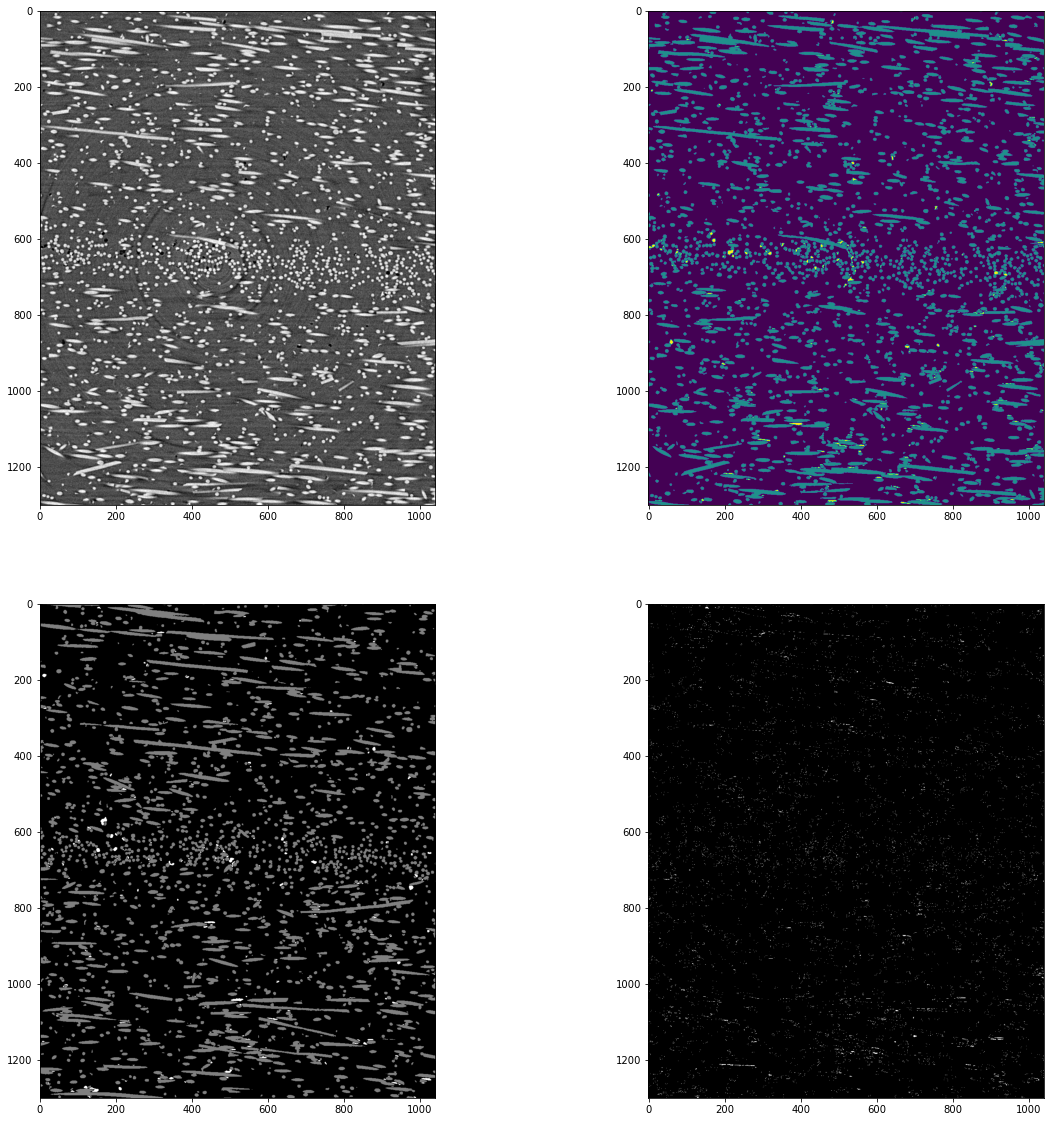

In [12]:
test_slice_idx = 100
slice_idx = 1600 + test_slice_idx

fig, axs = plt.subplots(2, 2, figsize=(20, 20))

axs[0, 0].imshow(pa66_arrays["data"][:, :, slice_idx], cmap='gray', vmin=0, vmax=255)
axs[0, 1].imshow(pa66_arrays["ground_truth"][:, :, slice_idx], vmin=0, vmax=2)

axs[1, 0].imshow(pa66_arrays["prediction"][:, :, test_slice_idx], cmap='gray', vmin=0, vmax=2)
axs[1, 1].imshow(pa66_arrays["error"][:, :, test_slice_idx], vmin=0, vmax=1, cmap="gray")

### crack

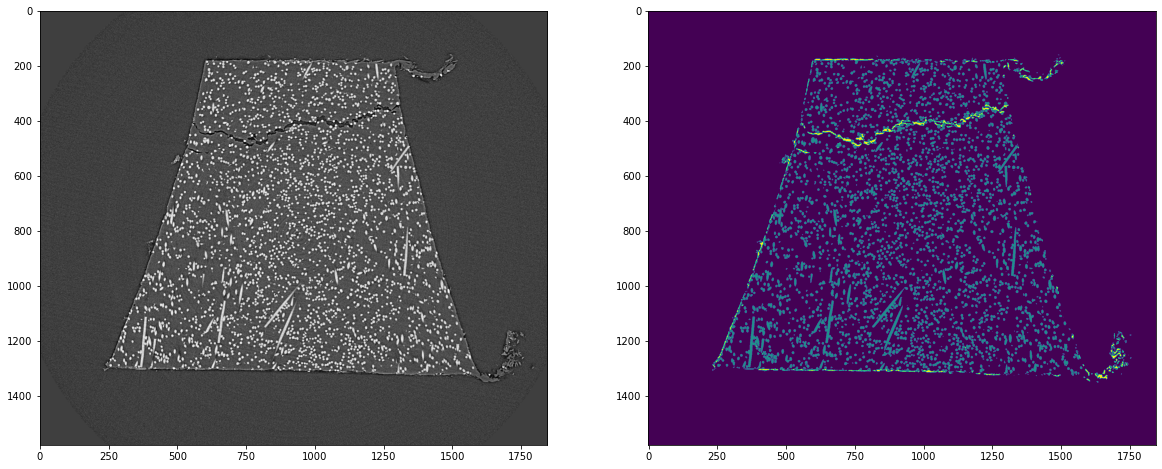

In [13]:
slice_idx = 100

fig, axs = plt.subplots(1, 2, figsize=(20, 10))

axs[0].imshow(crack_arrays["data"][:, :, slice_idx], cmap='gray', vmin=0, vmax=255)
axs[1].imshow(crack_arrays["prediction"][:, :, slice_idx], vmin=0, vmax=2)